In [10]:
!pip install autokeras

^C


In [4]:
import pandas as pd
import geopandas as gpd
import tensorflow as tf
import teller as tr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import missingno as msno
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np

In [5]:
shp_path = '100m.shp'
gdf = gpd.read_file(shp_path)

parquet_path = '100m.parquet'
gdf.to_parquet(parquet_path)

DriverError: 100m.shp: No such file or directory

In [15]:
# pd.reset_option('^display.', silent=True)


In [16]:
df_p = pd.read_parquet('./100m.parquet', engine='pyarrow')
df_p

,fid,id,name,cropa_aft,crevicea_a,crevicel_l,crossp_pft,ctowerp_pf,ctrlpntp_p,admarea_af,...,przej_ws_1,przej_ws_2,przej_ws_3,przej_ws_4,przej_ws_5,przej_ws_6,przej_ws_7,przej_ws_8,przej_ws_9,geometry
0,1.0,7515927,None,0.0,0.0,0.0,0.0,0.0,0.0,10004.043152,...,0.770394,-1.0,0.111801,0.983850,0.843433,1.0,-1.0,0.958834,0.469788,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1,2.0,7515929,None,0.0,0.0,0.0,0.0,0.0,0.0,10004.058116,...,0.418342,-1.0,0.180419,0.276239,0.831914,1.0,-1.0,1.000000,-0.798214,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2,3.0,7922649,None,0.0,0.0,0.0,0.0,0.0,0.0,9968.171990,...,0.635198,-1.0,0.190709,0.657922,0.883413,1.0,-1.0,1.000000,-0.114583,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
3,4.0,7515930,None,0.0,0.0,0.0,0.0,0.0,0.0,10004.065605,...,0.403380,-1.0,0.111801,0.276238,0.854727,1.0,-1.0,1.000000,-0.800000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4,5.0,7922652,None,0.0,0.0,0.0,0.0,0.0,0.0,9968.190629,...,0.554731,-1.0,0.111801,0.697345,0.892642,1.0,-1.0,0.753210,-0.052822,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295767,295768.0,7958574,None,0.0,0.0,0.0,0.0,0.0,0.0,9964.399978,...,0.396502,-1.0,0.111801,0.279108,0.804592,1.0,-1.0,1.000000,-0.800000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
295768,295769.0,7959569,None,0.0,0.0,0.0,0.0,0.0,0.0,9961.384246,...,0.362713,-1.0,0.111801,0.279326,0.835093,1.0,-1.0,0.883670,-0.929126,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
295769,295770.0,7959588,None,0.0,0.0,0.0,0.0,0.0,0.0,9961.457933,...,0.409485,-1.0,0.111801,0.279321,0.887256,1.0,-1.0,1.000000,-0.800000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
295770,295771.0,7962660,None,0.0,0.0,0.0,0.0,0.0,0.0,9961.393478,...,0.173030,-1.0,0.156469,0.008991,0.851548,1.0,-1.0,0.538594,-1.611154,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...


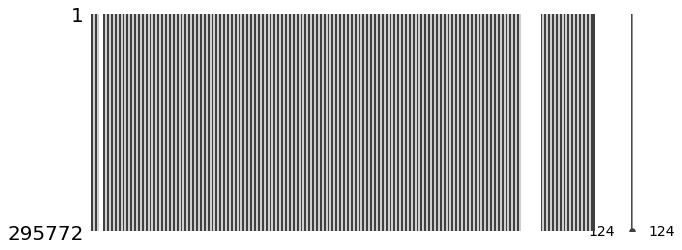

In [17]:
df_p = df_p.loc[:, (df_p != 0).any(axis=0)] #wycinanie pustych kolumn
msno.matrix(df_p, figsize=(10,4)) # test pustych wierszy
df_p =df_p.fillna(0) # wypełnianie Nan zerami

In [18]:
df_p.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fid,295772.0,1.478865e+05,85382.166247,1.000000e+00,7.394375e+04,1.478865e+05,2.218292e+05,2.957720e+05
id,295772.0,7.457191e+06,317693.277225,6.834333e+06,7.190008e+06,7.455702e+06,7.725570e+06,8.020146e+06
name,295772.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
crossp_pft,295772.0,4.023369e-04,0.020054,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ctrlpntp_p,295772.0,2.441069e-03,0.049347,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
przej_ws_5,295772.0,8.204413e-01,0.082703,0.000000e+00,7.962997e-01,8.477631e-01,8.752743e-01,1.000000e+00
przej_ws_6,295772.0,9.922256e-01,0.059066,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
przej_ws_7,295772.0,-1.000000e+00,0.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
przej_ws_8,295772.0,9.377472e-01,0.181769,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [20]:
df_p.head()

,fid,id,name,crossp_pft,ctrlpntp_p,admarea_af,admbndl_lf,airportp_p,athlflda_a,bamboop_pf,...,przej_ws_1,przej_ws_2,przej_ws_3,przej_ws_4,przej_ws_5,przej_ws_6,przej_ws_7,przej_ws_8,przej_ws_9,geometry
0,1.0,7515927,0,0.0,0.0,10004.043152,0.0,0.0,0.0,0.0,...,0.770394,-1.0,0.111801,0.983850,0.843433,1.0,-1.0,0.958834,0.469788,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1,2.0,7515929,0,0.0,0.0,10004.058116,0.0,0.0,0.0,0.0,...,0.418342,-1.0,0.180419,0.276239,0.831914,1.0,-1.0,1.000000,-0.798214,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2,3.0,7922649,0,0.0,0.0,9968.171990,0.0,0.0,0.0,0.0,...,0.635198,-1.0,0.190709,0.657922,0.883413,1.0,-1.0,1.000000,-0.114583,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
3,4.0,7515930,0,0.0,0.0,10004.065605,0.0,0.0,0.0,0.0,...,0.403380,-1.0,0.111801,0.276238,0.854727,1.0,-1.0,1.000000,-0.800000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4,5.0,7922652,0,0.0,0.0,9968.190629,0.0,0.0,0.0,0.0,...,0.554731,-1.0,0.111801,0.697345,0.892642,1.0,-1.0,0.753210,-0.052822,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...


In [21]:
df_p.shape

(295772, 130)

In [193]:
df_p.columns.to_list()[3:-11]

['crossp_pft',
 'ctrlpntp_p',
 'admarea_af',
 'admbndl_lf',
 'airportp_p',
 'athlflda_a',
 'bamboop_pf',
 'beachl_lft',
 'bluffl_lft',
 'bndmontp_p',
 'boulderp_p',
 'bridgec_pf',
 'bridgel_lf',
 'buildnga_a',
 'buildngp_p',
 'cultxt_pft',
 'builtupa_a',
 'cairnp_pft',
 'campsita_a',
 'cartracl_l',
 'cemetrya_a',
 'cemetryp_p',
 'chimneyp_p',
 'cisternp_p',
 'clearwa_af',
 'clearwl_lf',
 'commbldp_p',
 'commtwrp_p',
 'contourl_l',
 'curflowp_p',
 'cutl_lft',
 'damc_pft',
 'depota_aft',
 'depressl_l',
 'depressp_p',
 'depthcl_lf',
 'disposa_af',
 'ditchl_lft',
 'drditchl_l',
 'elevp_pft',
 'embankl_lf',
 'farmp_pft',
 'fencel_lft',
 'firernga_a',
 'fishfrma_a',
 'fordc_pft',
 'foresta_af',
 'forestl_lf',
 'forestp_pf',
 'grassa_aft',
 'grdelema_a',
 'gullyl_lft',
 'hedgel_lft',
 'hutp_pft',
 'hydrotxt_p',
 'inlandp_pf',
 'islanda_af',
 'lakea_aft',
 'landsldp_p',
 'monumntp_p',
 'orchara_af',
 'parka_aft',
 'phystxt_pf',
 'piera_aft',
 'pita_aft',
 'pitp_pft',
 'plazaa_aft',
 'procplta_

In [198]:
#normalizacja
X = df_p.iloc[:,3:-12]
X = MinMaxScaler().fit_transform(X)
y = df_p['przej_wsp_']
X.shape, y.shape

((295772, 115), (295772,))

In [199]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42, test_size=.2)

In [200]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((236617, 115), (59155, 115), (236617,), (59155,))

# MODEL

In [201]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Concatenate,Dropout,CategoryEncoding, Embedding, Flatten,Conv2D, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.random import set_seed #ustawiam ziarno pseudolosowości
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime as dt
import os

In [202]:
N_TRAIN = int(1e4)
BATCH_SIZE = 128
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1.5,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

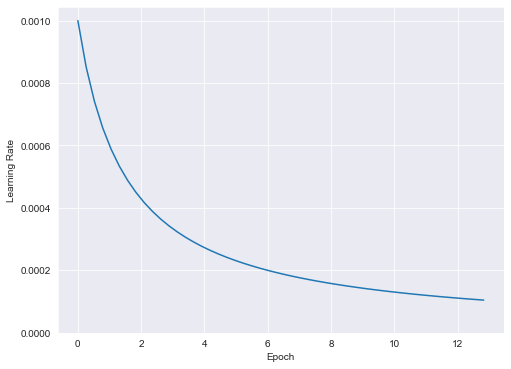

In [203]:
step = np.linspace(0,1000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

In [205]:
from keras import regularizers


def create_ANN():
    set_seed(0)
    model = Sequential()
    model.add(
        Dense(57, activation='relu',
              kernel_regularizer=regularizers.l2(0.001), #opcja
              kernel_initializer='he_uniform')
    )
    model.add(Dropout(0.5))
    # model.add(Dense(32, activation='relu'))
    model.add(
        Dense(1, activation='relu',
              kernel_regularizer=regularizers.l2(0.001))# opcja
    )

    model.compile(
        loss='mse',
        optimizer=get_optimizer(),
        metrics=['mae','mse'])

    return model

In [206]:
_filepath = 'checkpoint/ann-{epoch:02d}-{loss:.3f}.h5' # for filepath
checkpoint = ModelCheckpoint(monitor='loss', filepath='checkpoint/_best-ann.h5', save_best_only=True, verbose=1)
es = EarlyStopping(monitor='loss', patience=3, min_delta=0.01, verbose=1)
tb = TensorBoard(log_dir='logs/'+dt.now().strftime("%Y%m%d-%H%M%S")) # logi tensor board

In [207]:
model = create_ANN()

result = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    validation_split=.5,
    callbacks=[checkpoint,es,tb]
    # verbose=0,
)

Epoch 1/50
913/925 [============================>.] - ETA: 0s - loss: 0.0708 - mae: 0.1538 - mse: 0.0405
Epoch 1: loss improved from inf to 0.07037, saving model to checkpoint\_best-ann.h5
925/925 [==============================] - 6s 6ms/step - loss: 0.0704 - mae: 0.1533 - mse: 0.0403 - val_loss: 0.0172 - val_mae: 0.0449 - val_mse: 0.0033
Epoch 2/50
920/925 [============================>.] - ETA: 0s - loss: 0.0285 - mae: 0.1041 - mse: 0.0173
Epoch 2: loss improved from 0.07037 to 0.02847, saving model to checkpoint\_best-ann.h5
925/925 [==============================] - 3s 3ms/step - loss: 0.0285 - mae: 0.1040 - mse: 0.0173 - val_loss: 0.0116 - val_mae: 0.0375 - val_mse: 0.0023
Epoch 3/50
921/925 [============================>.] - ETA: 0s - loss: 0.0220 - mae: 0.0923 - mse: 0.0137
Epoch 3: loss improved from 0.02847 to 0.02199, saving model to checkpoint\_best-ann.h5
925/925 [==============================] - 3s 3ms/step - loss: 0.0220 - mae: 0.0922 - mse: 0.0137 - val_loss: 0.0092 - 

In [208]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 57)                6612      
                                                                 
 dropout_3 (Dropout)         (None, 57)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 58        
                                                                 
Total params: 6,670
Trainable params: 6,670
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [302]:
# evaluate the keras model
loss,  mae , mse = model.evaluate(X_test, y_test)
print(f'loss:{loss}, \nmse: {mae}')

1849/1849 [==============================] - 2s 1ms/step - loss: 0.0052 - mae: 0.0246 - mse: 0.0010
loss:0.005171019583940506, 
mse: 0.024551939219236374


Text(0.5, 0, 'Epoka')

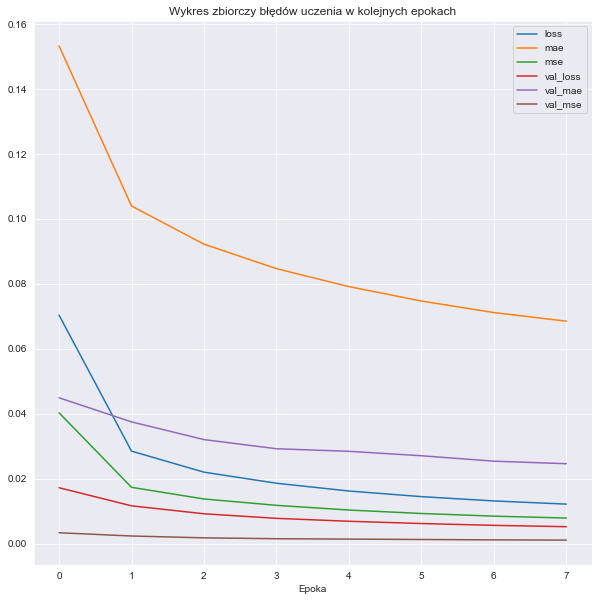

In [303]:
df_results = pd.DataFrame(result.history)
df_results.plot(figsize=(10,10))
plt.title('Wykres zbiorczy błędów uczenia w kolejnych epokach')
plt.xlabel('Epoka')

In [304]:
df_results

,loss,mae,mse,val_loss,val_mae,val_mse
0,0.070365,0.153325,0.040286,0.017197,0.044907,0.003326
1,0.028466,0.104000,0.017320,0.011619,0.037483,0.002322
2,0.021994,0.092234,0.013732,0.009174,0.032032,0.001760
3,0.018579,0.084702,0.011772,0.007762,0.029206,0.001488
4,0.016189,0.079164,0.010325,0.006867,0.028416,0.001374
5,0.014455,0.074721,0.009261,0.006167,0.027051,0.001251
6,0.013129,0.071165,0.008444,0.005604,0.025380,0.001131
7,0.012148,0.068509,0.007856,0.005189,0.024596,0.001065


[]

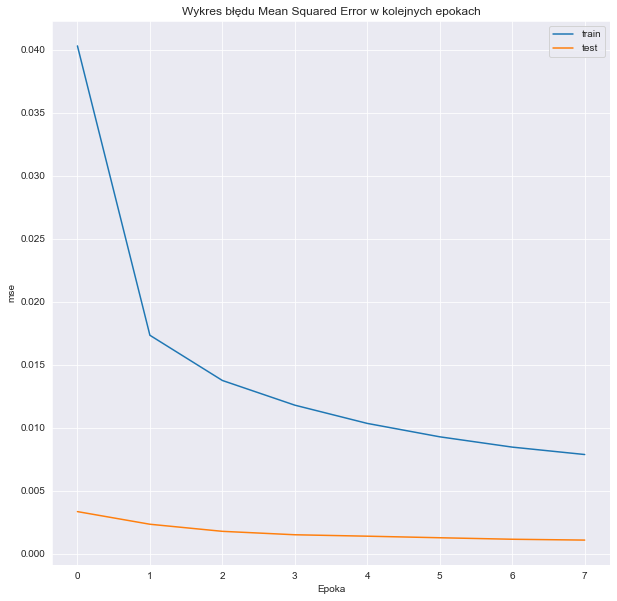

In [305]:
plt.figure(figsize = (10,10))
plt.title('Wykres błędu Mean Squared Error w kolejnych epokach')
plt.plot(result.history['mse'], label='train',)
plt.plot(result.history['val_mse'], label='test')
plt.xlabel('Epoka')
plt.ylabel('mse')
plt.legend()
plt.plot(figsize=(10,10))

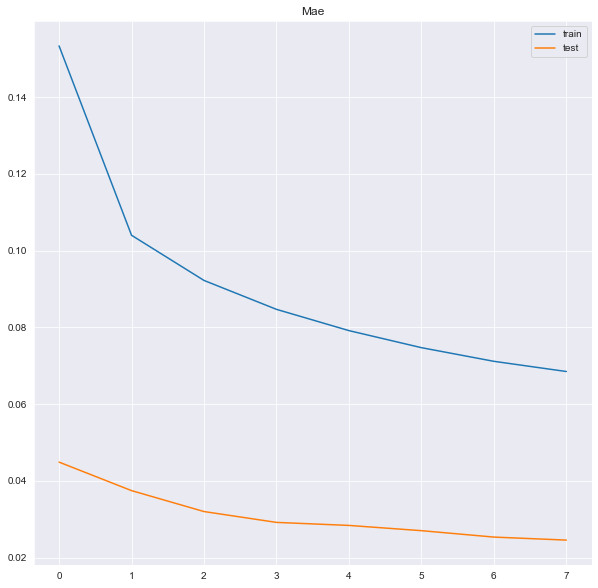

In [310]:
plt.figure(figsize = (10,10))
plt.title('Mae')
plt.plot(result.history['mae'], label='train')
plt.plot(result.history['val_mae'], label='test')
plt.legend()

In [311]:
y_predicted = model.predict(X_test)

1849/1849 [==============================] - 2s 826us/step


In [312]:
df__a = pd.DataFrame(y_test)
df__a['y_predicted']=y_predicted
df__a['diff']=df__a.y_predicted-df__a.przej_wsp_
df__a['abs_diff'] = abs(df__a['diff'])
df__a['diff_pow']=df__a['diff']*df__a['diff']
df__a.tail()

,przej_wsp_,y_predicted,diff,abs_diff,diff_pow
55736,0.792863,0.766054,-0.026809,0.026809,0.000719
227776,0.752596,0.738665,-0.013931,0.013931,0.000194
157128,0.779360,0.749588,-0.029772,0.029772,0.000886
191597,0.464854,0.492775,0.027921,0.027921,0.000780
156345,0.817822,0.802725,-0.015096,0.015096,0.000228


In [315]:
df__a.describe()

,przej_wsp_,y_predicted,diff,abs_diff,diff_pow
count,59155.000000,59155.000000,59155.000000,5.915500e+04,5.915500e+04
mean,0.663939,0.651900,-0.012039,2.455196e-02,1.046918e-03
std,0.189306,0.173065,0.030033,2.107432e-02,3.209228e-03
min,0.019873,0.161646,-0.272073,4.841523e-07,2.344034e-13
25%,0.479651,0.472478,-0.027658,1.201115e-02,1.442676e-04
50%,0.770385,0.751646,-0.016729,2.073636e-02,4.299966e-04
75%,0.796887,0.776291,-0.002373,3.190078e-02,1.017660e-03
max,0.973652,0.902184,0.348583,3.485835e-01,1.215104e-01


In [316]:
import math
mean_ref = df__a['przej_wsp_'].describe()[1]
bias = df__a['diff'].describe()[1]
mae =df__a['abs_diff'].describe()[1]
RMSE = math.sqrt(df__a['diff_pow'].sum()/df__a.shape[0])
print(
    f'mean_ref: {mean_ref},'
    f'\nbias: {bias}, \nbias_%: {bias/mean_ref*100}, '
    f'\nmae: {mae}, \nmae_%: {mae/mean_ref*100}, '
    f'\nRMSE: {RMSE} \nRMSE %: {RMSE/mean_ref*100}'
)

mean_ref: 0.6639386948748767,
bias: -0.012038813207514898, 
bias_%: -1.813241689397797, 
mae: 0.024551958056385558, 
mae_%: 3.6979254629845797, 
RMSE: 0.03235611431111141 
RMSE %: 4.873358724363719


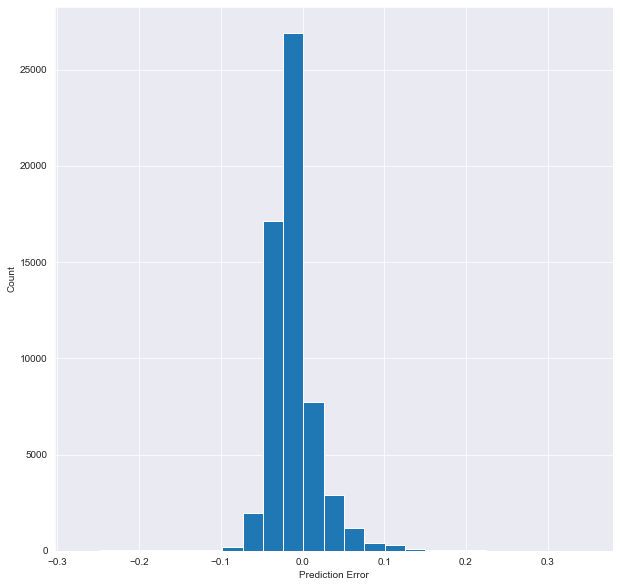

In [313]:
# rozkład błedów
error = df__a.y_predicted-df__a.przej_wsp_
plt.figure(figsize = (10,10))
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

C:\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='przej_wsp_', ylabel='y_predicted'>

<Figure size 1080x1080 with 0 Axes>

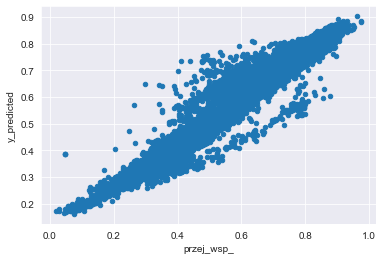

In [297]:
plt.figure(figsize = (15,15))
df__a.plot.scatter(y='y_predicted', x='przej_wsp_')